In [1]:
import pandas as pd
df=pd.read_csv("adult.csv")
df

,age,work_class,fnlwgt,education_level,yrs_of_ed,marital_status,occupation,relation,race,gender,capital_gain,capital_loss,hours_per_week,native_country,census_incom
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [2]:
df=df.replace(" ?", "unknown")

In [3]:
import numpy as np
np.unique(df[["native_country"]])

array([' Cambodia', ' Canada', ' China', ' Columbia', ' Cuba',
       ' Dominican-Republic', ' Ecuador', ' El-Salvador', ' England',
       ' France', ' Germany', ' Greece', ' Guatemala', ' Haiti',
       ' Holand-Netherlands', ' Honduras', ' Hong', ' Hungary', ' India',
       ' Iran', ' Ireland', ' Italy', ' Jamaica', ' Japan', ' Laos',
       ' Mexico', ' Nicaragua', ' Outlying-US(Guam-USVI-etc)', ' Peru',
       ' Philippines', ' Poland', ' Portugal', ' Puerto-Rico',
       ' Scotland', ' South', ' Taiwan', ' Thailand', ' Trinadad&Tobago',
       ' United-States', ' Vietnam', ' Yugoslavia', 'unknown'],
      dtype=object)

Check for missing numeric values. Summary statistics is not needed here, but the "describe" method will tell us the maximum values of all numeric columns. The purpose is to look for values such as 99, 999, 9999, 99999, ect. A lot of the time, missing numeric values are filled with such values.

In [4]:
df.describe()

,age,fnlwgt,yrs_of_ed,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


It seems that two numeric values have missing values: "capital_gain" and "work_hours_per_week".

Plot the "capital_gain" column to see the distribution of the values in this column.

<AxesSubplot:ylabel='Frequency'>

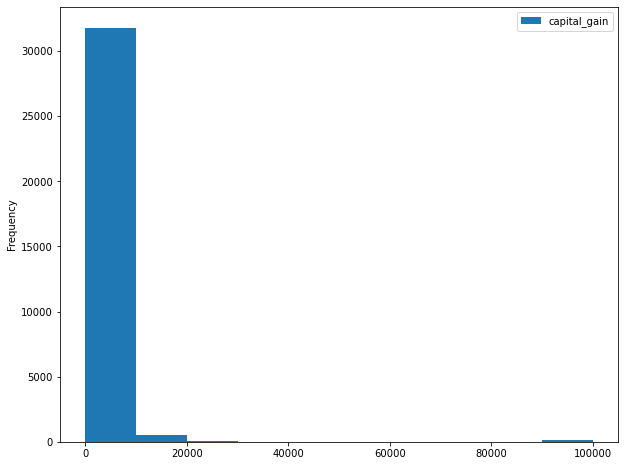

In [5]:
import matplotlib.pyplot as plt
df[["capital_gain"]].plot(kind="hist",figsize=(10,8))

Separate the rows in the "capital_gain" column that are not equal to 99999. Compute the mean of these values and replace the 99999's with this mean. The mean in the summary statistics above is not the real mean. It is inflated by the presence of 99999 that might have been used to fill the spaces of missing values.

In [6]:
capital_gain=df[df["capital_gain"]!=99999.000000]
capital_gain

,age,work_class,fnlwgt,education_level,yrs_of_ed,marital_status,occupation,relation,race,gender,capital_gain,capital_loss,hours_per_week,native_country,census_incom
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [7]:
mean=capital_gain[["capital_gain"]].mean()
mean

capital_gain    592.231436
dtype: float64

In [8]:
df[["capital_gain"]]=df[["capital_gain"]].replace(99999.000000,mean)
df.describe()

,age,fnlwgt,yrs_of_ed,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


Repeat the process above for the "hours_per_week" column.

<AxesSubplot:ylabel='Frequency'>

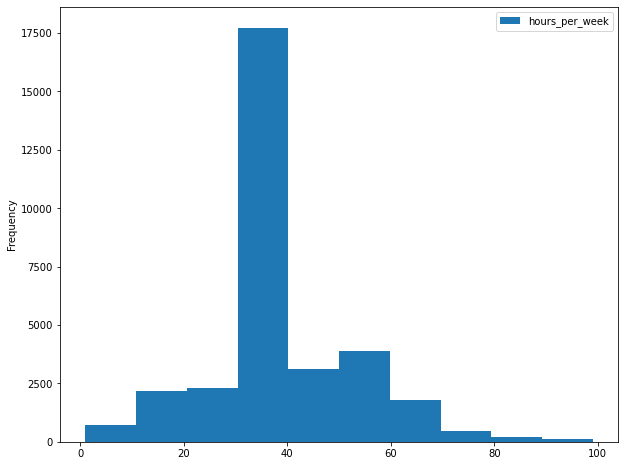

In [9]:
df[["hours_per_week"]].plot(kind="hist",figsize=(10,8))

The "hours_per_week" have values that exceed our expectation of work hours per week. The values of this column range from 0 to 99, with quite a few of them in the 90's range. Replacing all these values with the mean computed without them will likely distort the fact reflected in the dataset. So, for right now, keep the "hours_per_week" column as it is. A feature selection algorithm will be used to select the most important features. If the "hours_per_week" column comes out to have little relation with the target column, we will just discard the entire "hours_per_week" column.

Check whether the dataset has uneven class distribution.

In [10]:
df.groupby(["census_incom"])["census_incom"].count()

census_incom
 <=50K    24720
 >50K      7841
Name: census_incom, dtype: int64

In [11]:
print(7841/24720)
print(7841/(7841+24720))

0.31719255663430423
0.2408095574460244


The dataset is unevenly distributed. The minority class is about 32% of the majority class and only about 24% of the entire dataset. Any model built using this dataset is likely going to have low sensitivity toward the minority class ">50K".

We are going to randomly split the minority classes into 20 subsets. Each subset will have 392 instances. We will then feed 7 of these subsets into a synthetic data generator to enlarge each of these 5 subsets to 1000 rows. The synthetic data will be merged with the majority class data. As a result, the recalibrated dataset will have 4256 additional rows with synthetic data. The proportion of the minority class in the entire dataset will increase to about 33%. That will increase the model's sensitivity to the minority class, as it will have more data to train on.

In [12]:
y=df[["census_incom"]]
y.head()

,census_incom
0,<=50K
1,<=50K
2,<=50K
3,<=50K
4,<=50K


In [13]:
y_minority=y[y["census_incom"]==" >50K"]
y_minority.head()

,census_incom
7,>50K
8,>50K
9,>50K
10,>50K
11,>50K


In [14]:
y_minority.shape

(7841, 1)

In [15]:
subset_1=y_minority.sample(n=392)
y_minority=y_minority.drop(subset_1.index,axis=0)
subset_2=y_minority.sample(n=392)

y_minority=y_minority.drop(subset_2.index,axis=0)
subset_3=y_minority.sample(n=392)

y_minority=y_minority.drop(subset_3.index,axis=0)
subset_4=y_minority.sample(n=392)

y_minority=y_minority.drop(subset_4.index,axis=0)
subset_5=y_minority.sample(n=392)

y_minority=y_minority.drop(subset_5.index,axis=0)
subset_6=y_minority.sample(n=392)

y_minority=y_minority.drop(subset_6.index,axis=0)
subset_7=y_minority.sample(n=392)

In [16]:
df_1=df.loc[subset_1.index,:]
#df_1.to_csv("df_1.csv")

In [17]:
df_2=df.loc[subset_2.index,:]
#df_2.to_csv("df_2.csv")

In [18]:
df_3=df.loc[subset_3.index,:]
#df_3.to_csv("df_3.csv")

In [19]:
df_4=df.loc[subset_4.index,:]
#df_4.to_csv("df_4.csv")

In [20]:
df_5=df.loc[subset_5.index,:]
#df_5.to_csv("df_5.csv")

In [21]:
df_6=df.loc[subset_6.index,:]
#df_6.to_csv("df_6.csv")

In [22]:
df_7=df.loc[subset_7.index,:]
#df_7.to_csv("df_7.csv")

In [23]:
sub_df=df.drop(df_1.index)
#sub_df

In [24]:
sub_df=sub_df.drop(df_2.index)
sub_df

,age,work_class,fnlwgt,education_level,yrs_of_ed,marital_status,occupation,relation,race,gender,capital_gain,capital_loss,hours_per_week,native_country,census_incom
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [25]:
sub_df=sub_df.drop(df_3.index)
sub_df=sub_df.drop(df_4.index)
sub_df=sub_df.drop(df_5.index)
sub_df=sub_df.drop(df_6.index)
sub_df=sub_df.drop(df_7.index)
sub_df

,age,work_class,fnlwgt,education_level,yrs_of_ed,marital_status,occupation,relation,race,gender,capital_gain,capital_loss,hours_per_week,native_country,census_incom
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


29,817 rows of original data. Merge the original data with the synthetic data.

In [26]:
df_1=pd.read_csv("df_1.csv")
df_1.shape

(1000, 15)

In [27]:
df_2=pd.read_csv("df_2.csv")
df_2.shape

(1000, 15)

In [28]:
df_3=pd.read_csv("df_3.csv")
df_3.shape

(1000, 15)

In [29]:
df_4=pd.read_csv("df_4.csv")
df_4.shape

(1000, 15)

In [30]:
df_5=pd.read_csv("df_5.csv")
df_5.shape

(1000, 15)

In [31]:
df_6=pd.read_csv("df_6.csv")
df_6.shape

(1000, 15)

In [32]:
df_7=pd.read_csv("df_7.csv")
df_7.shape

(1000, 15)

In [33]:
df=pd.concat([sub_df,df_1,df_2,df_3,df_4,df_5,df_6,df_7],axis=0)
df.shape

(36817, 15)

In [34]:
df.head()

,age,work_class,fnlwgt,education_level,yrs_of_ed,marital_status,occupation,relation,race,gender,capital_gain,capital_loss,hours_per_week,native_country,census_incom
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [35]:
df.groupby(["census_incom"])["census_incom"].count()

census_incom
 <=50K    24720
 >50K     12097
Name: census_incom, dtype: int64

With synthetic data, the proportion of the minority class increases, making the dataset less imbalanced.

Label-encoe the categorical variables.

In [36]:
categorical=df[["work_class","education_level","marital_status","occupation","relation","race","gender","native_country"]]
categorical.head()

,work_class,education_level,marital_status,occupation,relation,race,gender,native_country
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba


In [37]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
categorical=categorical.apply(le.fit_transform)
categorical.head()

,work_class,education_level,marital_status,occupation,relation,race,gender,native_country
0,6,9,4,0,1,4,1,38
1,5,9,2,3,0,4,1,38
2,3,11,0,5,1,4,1,38
3,3,1,2,5,0,2,1,38
4,3,9,2,9,5,2,0,4


In [38]:
numeric=df.drop(["work_class","education_level","marital_status","occupation","relation","race","gender","native_country"],axis=1)
df=pd.concat([categorical,numeric],axis=1)
df.head()

,work_class,education_level,marital_status,occupation,relation,race,gender,native_country,age,fnlwgt,yrs_of_ed,capital_gain,capital_loss,hours_per_week,census_incom
0,6,9,4,0,1,4,1,38,39,77516,13,2174,0,40,<=50K
1,5,9,2,3,0,4,1,38,50,83311,13,0,0,13,<=50K
2,3,11,0,5,1,4,1,38,38,215646,9,0,0,40,<=50K
3,3,1,2,5,0,2,1,38,53,234721,7,0,0,40,<=50K
4,3,9,2,9,5,2,0,4,28,338409,13,0,0,40,<=50K


In [39]:
from sklearn.preprocessing import StandardScaler
X=df.drop(["census_incom"],axis=1)
names=X.columns
scaler = StandardScaler()
X=pd.DataFrame(scaler.fit_transform(X),columns=names)
X.head()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,work_class,education_level,marital_status,occupation,relation,race,gender,native_country,age,fnlwgt,yrs_of_ed,capital_gain,capital_loss,hours_per_week
0,1.682421,-0.358132,1.001247,-1.492602,-0.226588,0.381103,0.669928,0.248205,-0.019292,-1.068764,1.056760,0.122654,-0.231184,-0.086674
1,1.044702,-0.358132,-0.374260,-0.794840,-0.842208,0.381103,0.669928,0.248205,0.798665,-1.013452,1.056760,-0.165231,-0.231184,-2.271779
2,-0.230738,0.170890,-1.749767,-0.329666,-0.226588,0.381103,0.669928,0.248205,-0.093652,0.249651,-0.481694,-0.165231,-0.231184,-0.086674
3,-0.230738,-2.474219,-0.374260,-0.329666,-0.842208,-2.028700,0.669928,0.248205,1.021745,0.431717,-1.250921,-0.165231,-0.231184,-0.086674
4,-0.230738,-0.358132,-0.374260,0.600682,2.235895,-2.028700,-1.492697,-5.400643,-0.837250,1.421391,1.056760,-0.165231,-0.231184,-0.086674


Optimal number of features : 14


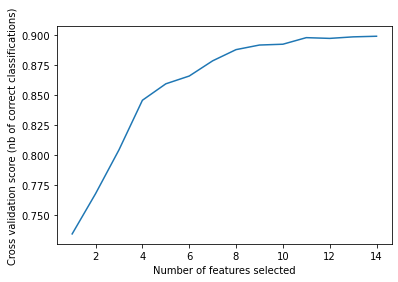

In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold

y=df[["census_incom"]]
n_samples=y.shape[0]
y=np.asarray(y).reshape(n_samples,)

estimator=RandomForestClassifier(n_estimators=100,criterion="entropy",random_state=0)
features=RFECV(estimator,step=1,cv=StratifiedKFold(5),scoring="accuracy")
features.fit(X, y)

print("Optimal number of features : %d" % features.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(features.grid_scores_) + 1), features.grid_scores_)
plt.show()

The RFECV algorithm determined that the optimal number of features is 14, that is the all the predictor columns in the dataset.

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)

(29453, 14)
(7364, 14)


In [43]:
import numpy as np
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 1000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [44]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
tree = RandomForestClassifier(class_weight="balanced_subsample",criterion="entropy",random_state=0)
rf_random = RandomizedSearchCV(estimator =tree, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, n_jobs = -1)

In [45]:
rf_random.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] n_estimators=377, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=10, bootstrap=False 


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=377, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=10, bootstrap=False, total=  19.3s
[CV] n_estimators=377, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=10, bootstrap=False 


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   21.2s remaining:    0.0s


[CV]  n_estimators=377, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=10, bootstrap=False, total=  19.2s
[CV] n_estimators=377, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=10, bootstrap=False 
[CV]  n_estimators=377, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=10, bootstrap=False, total=  19.2s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=100, bootstrap=False 
[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=100, bootstrap=False, total=  14.5s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=100, bootstrap=False 
[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=100, bootstrap=False, total=  14.7s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=100, bootstrap=False 
[CV]  n_estimators=200,

[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 258.5min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced_subsample',
            criterion='entropy', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators='warn', n_jobs=None, oob_score=False,
            random_state=0, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=100, n_jobs=-1,
          param_distributions={'n_estimators': [200, 288, 377, 466, 555, 644, 733, 822, 911, 1000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verb

In [46]:
rf_random.best_params_

{'n_estimators': 288,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 70,
 'bootstrap': False}

In [47]:
from sklearn.metrics import accuracy_score
best_random = rf_random.best_estimator_
y_pred=best_random.predict(X_test)
print("Accuracy on test data is: ",accuracy_score(y_test,y_pred))

Accuracy on test data is:  0.9121401412275937


In [48]:
from sklearn.metrics import confusion_matrix
print("Confusion matrix on test data: \n", confusion_matrix(y_test,y_pred))

Confusion matrix on test data: 
 [[4589  303]
 [ 344 2128]]


In [50]:
from sklearn.metrics import classification_report
print("Classification report for test data: \n", classification_report(y_test,y_pred))

Classification report for test data: 
               precision    recall  f1-score   support

       <=50K       0.93      0.94      0.93      4892
        >50K       0.88      0.86      0.87      2472

   micro avg       0.91      0.91      0.91      7364
   macro avg       0.90      0.90      0.90      7364
weighted avg       0.91      0.91      0.91      7364

